<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Second-Level-Design-Matrix" data-toc-modified-id="Second-Level-Design-Matrix-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Second Level Design Matrix</a></span></li><li><span><a href="#Valence-x-Outcome-Sanity-Check" data-toc-modified-id="Valence-x-Outcome-Sanity-Check-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Valence x Outcome Sanity Check</a></span></li><li><span><a href="#Adolescent-Cohort" data-toc-modified-id="Adolescent-Cohort-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Adolescent Cohort</a></span><ul class="toc-item"><li><span><a href="#Monetary-Task" data-toc-modified-id="Monetary-Task-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Monetary Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li><li><span><a href="#Social-Task" data-toc-modified-id="Social-Task-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Social Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li></ul></li><li><span><a href="#Young-Adult-Cohort" data-toc-modified-id="Young-Adult-Cohort-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Young Adult Cohort</a></span><ul class="toc-item"><li><span><a href="#Monetary-Task" data-toc-modified-id="Monetary-Task-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Monetary Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li><li><span><a href="#Social-Task" data-toc-modified-id="Social-Task-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Social Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li></ul></li><li><span><a href="#Group-differences" data-toc-modified-id="Group-differences-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Group differences</a></span><ul class="toc-item"><li><span><a href="#Monetary-Task" data-toc-modified-id="Monetary-Task-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Monetary Task</a></span></li><li><span><a href="#Social-Task" data-toc-modified-id="Social-Task-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Social Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li></ul></li><li><span><a href="#Accounting-for-Age" data-toc-modified-id="Accounting-for-Age-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Accounting for Age</a></span></li></ul></div>

In [6]:
import os
import glob
import pandas as pd

from matplotlib.gridspec import GridSpec

# Import cerebellum packages
import matplotlib.pyplot as plt
import SUITPy.flatmap as flatmap

from nilearn.glm.second_level import make_second_level_design_matrix
from nilearn.plotting import plot_design_matrix, plot_stat_map
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm import threshold_stats_img



In [7]:
#bids_dir = '/data/projects/social_doors/'
bids_dir = '/Users/haroonpopal/OneDrive - Temple University/olson_lab/projects/social_doors'


os.chdir(bids_dir)

data_dir = os.path.join(bids_dir, 'derivatives','social_doors-nilearn')

# Define subject list
#subjs_scan_info = pd.read_csv(bids_dir+'/derivatives/mriqc/mriqc_summary_poor.csv')
#subjs_list = list(subjs_scan_info['subject'].unique())
#subjs_list.sort()
subjs_info = pd.read_csv(bids_dir+'/derivatives/participants_good.tsv', sep='\t', index_col=0)
subjs_info = subjs_info.rename(columns={'participant_id': 'subject_label'})

# Remove participants with bad data
subjs_info = subjs_info[subjs_info['subject_label'].str.contains('sub-3880')==False]
subjs_info = subjs_info[subjs_info['subject_label'].str.contains('sub-4069')==False]


subjs_info_kids = subjs_info[subjs_info['group']=='kid']
subjs_info_colg = subjs_info[subjs_info['group']=='college']

subjs_list = subjs_info['subject_label'].to_list()
subjs_list_kids = subjs_info_kids['subject_label'].to_list()
subjs_list_colg = subjs_info_colg['subject_label'].to_list()

print('Found '+str(len(subjs_list_kids))+' adolescent subjects')
print('Found '+str(len(subjs_list_colg))+' college subjects')

Found 32 adolescent subjects
Found 29 college subjects


# Adolescents

In [8]:
# Filter for releveant data
subjs_info_fltr = subjs_info[['subject_label', 'age']]
subjs_info_kids_fltr = subjs_info_kids[['subject_label','age']]
subjs_info_colg_fltr = subjs_info_colg[['subject_label','age']]

In [9]:

design_matrix = make_second_level_design_matrix(subjs_list_kids, subjs_info_kids_fltr)

<AxesSubplot:label='conditions', ylabel='scan number'>

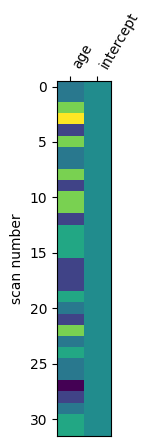

In [14]:

plot_design_matrix(design_matrix)

In [16]:
design_matrix = make_second_level_design_matrix(subjs_list_kids, subjs_info_kids_fltr)
mni_mask = bids_dir+'/derivatives/social_doors/sub-010/suit/iw_c_sub-010_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w_pcereb_u_a_sub-010_run-1_space-MNI152NLin2009cAsym_label-GM_probseg.nii'

#contrasts = ['valence_x_outcome',
#             'positive','positive_win','positive_loss',
#             'negative','negative_win','negative_loss']
contrasts=['all_winVlos', 'positive_winVlos']
contrasts_2nd = ['age','intercept']
tasks = ['mdoors','social']
group = 'kids'
alpha = 0.001


threshold_data = {}

for task in tasks:
    for contrast in contrasts:
        
        temp_file_list = []
        for subj in subjs_list_kids:
            temp_file = glob.glob(os.path.join(data_dir,subj,'suit',
                                               'iw_wdzmap_'+task+'_'+contrast+'_u_a_'+subj+'_run-1_space-MNI152NLin2009cAsym_label-GM_probseg.nii'))
            temp_file_list.append(temp_file[0])
        temp_file_list.sort()
        
        print('Calculating '+task+' group '+contrast+' contrast')
        
        model = SecondLevelModel(mask_img=mni_mask, smoothing_fwhm=8.0)
        model.fit(temp_file_list, design_matrix=design_matrix)
        
        for contrast_2nd in contrasts_2nd:
            z_map = model.compute_contrast(contrast_2nd, output_type='z_score')

            z_map.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'-suit_unc.nii.gz'))
            
            # Multiple Comparisons Correction
            z_map_thresh, threshold = threshold_stats_img(z_map, alpha=alpha, height_control='fpr')
            z_map_thresh.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'-suit_fpr.nii.gz'))
            
            threshold_data['zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_fpr_'+str(alpha)] = threshold

Calculating mdoors group all_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:74: UserWarning: The given float value must not exceed 3.081774327247138. But, you have given threshold=3.2905267314918945 
  threshold))
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:74: UserWarning: The given float value must not exceed 3.1950130190248287. But, you have given threshold=3.2905267314918945 
  threshold))


Calculating mdoors group positive_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:74: UserWarning: The given float value must not exceed 3.111471734551946. But, you have given threshold=3.2905267314918945 
  threshold))
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:74: UserWarning: The given float value must not exceed 3.1041441651375434. But, you have given threshold=3.2905267314918945 
  threshold))


Calculating social group all_winVlos contrast
Calculating social group positive_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:74: UserWarning: The given float value must not exceed 3.154095532275578. But, you have given threshold=3.2905267314918945 
  threshold))
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:74: UserWarning: The given float value must not exceed 3.024439706820591. But, you have given threshold=3.2905267314918945 
  threshold))


In [ ]:
data_dir

In [ ]:
def plot_stat_map_cb(filename, threshold):
    # Find stat map
    stat_filename = os.path.join(data_dir,'group',filename+'.nii.gz')

    # Import stat map as a cerebellum flatmap
    funcdata = flatmap.vol_to_surf(stat_filename,
                                  space='SUIT')

    # Set figure specs
    fig = plt.figure(figsize=(15, 4))
    gs = GridSpec(2, 3)
    ax_img1 = plt.subplot(gs[0, :2])
    ax_img2 = plt.subplot(gs[1, :2])

    # Plot stat maps
    hemi_lh = plot_stat_map(stat_filename, threshold=threshold, cut_coords=range(-65,0,10), display_mode='x', axes=ax_img1,
                            annotate=False, title='Left hemisphere')
    hemi_rh = plot_stat_map(stat_filename, threshold=threshold, cut_coords=range(66,5,-10), display_mode='x', axes=ax_img2,
                            annotate=False, title='Right hemisphere')
    hemi_lh.add_contours(stat_filename, levels=[-2.0,2.0], colors=['blue','red'], alpha=0.5, linewidths=1)
    hemi_rh.add_contours(stat_filename, levels=[-2.0,2.0], colors=['blue','red'], alpha=0.5, linewidths=1)
    ax_joint = plt.subplot(gs[:, 2:])
    ax_joint.set(title='Cerebellum flatmap')
    flatmap.plot(data=funcdata, cmap='hot',
                threshold=[-threshold,threshold],
                colorbar=False,
                render='matplotlib', new_figure=False)


### Monetary Task

#### Positive win > Positive loss

In [ ]:
filename = 'zmap_kids_mdoors_positive_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]
#threshold=1

plot_stat_map_cb(filename+'unc', threshold)

#### All wins > All losses

In [ ]:
filename = 'zmap_kids_mdoors_all_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

### Social Task

#### Positive win > Positive loss

In [ ]:
filename = 'zmap_kids_social_positive_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

#### All wins > All losses

In [ ]:
filename = 'zmap_kids_social_all_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

## Young Adult Cohort

In [ ]:
design_matrix = make_second_level_design_matrix(subjs_list_colg, subjs_info_colg_fltr)


contrasts=['all_winVlos', 'positive_winVlos']
contrasts_2nd = ['age','intercept']
tasks = ['mdoors','social']
group = 'colg'
alpha = 0.001


threshold_data = {}

for task in tasks:
    for contrast in contrasts:
        
        temp_file_list = []
        for subj in subjs_list_colg:
            temp_file = glob.glob(os.path.join(data_dir,subj,'suit',
                                               'iw_wdzmap_'+task+'_'+contrast+'_u_a_'+subj+'_run-1_space-MNI152NLin2009cAsym_label-GM_probseg.nii'))
            temp_file_list.append(temp_file[0])
        temp_file_list.sort()
        
        print('Calculating '+task+' group '+contrast+' contrast')
        
        model = SecondLevelModel(mask_img=mni_mask, smoothing_fwhm=8.0)
        model.fit(temp_file_list, design_matrix=design_matrix)
        
        for contrast_2nd in contrasts_2nd:
            z_map = model.compute_contrast(contrast_2nd, output_type='z_score')

            z_map.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'-suit_unc.nii.gz'))
            
            # Multiple Comparisons Correction
            z_map_thresh, threshold = threshold_stats_img(z_map, alpha=alpha, height_control='fpr')
            z_map_thresh.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'-suit_fpr.nii.gz'))
            
            threshold_data['zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_fpr_'+str(alpha)] = threshold

### Monetary Task

#### Positive win > Positive loss

In [ ]:
filename = 'zmap_colg_mdoors_positive_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

#### All wins > All losses

In [ ]:
filename = 'zmap_colg_mdoors_all_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

### Social Task

#### Positive win > Positive loss

In [ ]:
filename = 'zmap_colg_social_positive_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

#### All wins > All losses

In [ ]:
filename = 'zmap_colg_social_all_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

# All Subjects

In [ ]:
subjs_info_num = subjs_info.copy()
subjs_info_num = subjs_info_num.replace({'sex': {'F': 0, 'M': 1},
                                         'group': {'college': -1, 'kid': 1}})
subjs_info_num = subjs_info_num.drop(columns=['age', 'sex'])

design_matrix = make_second_level_design_matrix(subjs_list, subjs_info_num)

plot_design_matrix(design_matrix)

In [ ]:
#design_matrix = make_second_level_design_matrix(subjs_list, subjs_info_fltr)

#contrasts = ['valence_x_outcome',
#             'positive','positive_win','positive_loss',
#             'negative','negative_win','negative_loss']
contrasts=['all_winVlos', 'positive_winVlos']
contrasts_2nd = ['intercept','group']
tasks = ['mdoors','social']
group = 'all'
alpha = 0.001

threshold_all = {}

#temp_file_list = []
#for subj in subjs_list_kids:
#    temp_file = glob.glob(os.path.join(data_dir,subj,'zmap_'+task+'_'+contrast+'.nii.gz'))
#    temp_file_list.append(temp_file[0])
for task in tasks:
    for contrast in contrasts:
        
        temp_file_list = []
        for subj in subjs_list:
            temp_file = glob.glob(os.path.join(data_dir,subj,'suit',
                                               'iw_wdzmap_'+task+'_'+contrast+'_u_a_'+subj+'_run-1_space-MNI152NLin2009cAsym_label-GM_probseg.nii'))
            temp_file_list.append(temp_file[0])
        temp_file_list.sort()
        
        print('Calculating '+task+' group '+contrast+' contrast')
        
        model = SecondLevelModel(mask_img=mni_mask, smoothing_fwhm=8.0)
        model.fit(temp_file_list, design_matrix=design_matrix)
        
        for contrast_2nd in contrasts_2nd:
            z_map = model.compute_contrast(contrast_2nd, output_type='z_score')

            z_map.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'-suit_unc.nii.gz'))
            
            # Multiple Comparisons Correction
            z_map_thresh, threshold = threshold_stats_img(z_map, alpha=alpha, height_control='fpr')
            z_map_thresh.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'-suit_fpr.nii.gz'))
            
            threshold_data['zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_fpr_'+str(alpha)] = threshold

## Group differences 
Where adolescents > young adults

### Monetary Task

#### Positive win > Positive loss

In [ ]:
filename = 'zmap_all_mdoors_positive_winVlos_group_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

#### All wins > All losses

In [ ]:
filename = 'zmap_all_mdoors_all_winVlos_group_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

### Social Task

#### Positive win > Positive loss

In [ ]:
filename = 'zmap_all_social_positive_winVlos_group_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

#### All wins > All losses

In [ ]:
filename = 'zmap_all_social_all_winVlos_group_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

## Accounting for Age

### Monetary Task

#### Positive win > Positive loss

In [ ]:
filename = 'zmap_all_mdoors_positive_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

#### All wins > All losses

In [ ]:
filename = 'zmap_all_mdoors_all_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

### Social Task

#### Positive wins > Positive losses

In [ ]:
filename = 'zmap_all_social_positive_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

#### All wins > All losses

In [ ]:
filename = 'zmap_all_social_all_winVlos_intercept_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]

plot_stat_map_cb(filename+'unc', threshold)

# Behavioral Analysis

In [ ]:
behav_data = pd.read_excel(bids_dir+'/derivatives/behavioral/aggregate_full_data_SPSS_020419.xlsx',
                          sheet_name='Sheet1')

behav_data.head()

In [ ]:
behav_data_fltr = behav_data[['Subject','ch_totanx', 'ch_cdi_total']]

behav_data_fltr['Subject'] = behav_data_fltr['Subject'].str.replace('s','sub-')

behav_data_fltr = behav_data_fltr.rename(columns={'Subject':'subject_label'})

behav_data_fltr.head()

In [ ]:
# Add behavioral data to design matrix

subjs_info_kids_behav = subjs_info_kids_fltr.merge(behav_data_fltr, on='subject_label')


design_matrix = make_second_level_design_matrix(subjs_list_kids, subjs_info_kids_behav)

plot_design_matrix(design_matrix)

In [ ]:
#design_matrix = make_second_level_design_matrix(subjs_list_kids, subjs_info_kids_fltr)
mni_mask = bids_dir+"/derivatives/fmriprep/sub-010/anat/sub-010_space-MNI152NLin2009cAsym_label-GM_probseg_bin.nii.gz"

#contrasts = ['valence_x_outcome',
#             'positive','positive_win','positive_loss',
#             'negative','negative_win','negative_loss']
contrasts=['all_winVlos', 'positive_winVlos']
contrasts_2nd = ['ch_totanx','ch_cdi_total']
tasks = ['mdoors','social']
group = 'kids'
alpha = 0.001


threshold_data = {}

for task in tasks:
    for contrast in contrasts:
        
        temp_file_list = []
        for subj in subjs_list_kids:
            temp_file = glob.glob(os.path.join(data_dir,subj,'suit',
                                               'iw_wdzmap_'+task+'_'+contrast+'_u_a_'+subj+'_run-1_space-MNI152NLin2009cAsym_label-GM_probseg.nii'))
            temp_file_list.append(temp_file[0])
        temp_file_list.sort()
        
        print('Calculating '+task+' group '+contrast+' contrast')
        
        model = SecondLevelModel(mask_img=mni_mask, smoothing_fwhm=8.0)
        model.fit(temp_file_list, design_matrix=design_matrix)
        
        for contrast_2nd in contrasts_2nd:
            z_map = model.compute_contrast(contrast_2nd, output_type='z_score')

            z_map.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'-suit_unc.nii.gz'))
            
            # Multiple Comparisons Correction
            z_map_thresh, threshold = threshold_stats_img(z_map, alpha=alpha, height_control='fpr')
            z_map_thresh.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'-suit_fpr.nii.gz'))
            
            threshold_data['zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_fpr_'+str(alpha)] = threshold

In [ ]:
filename = 'zmap_kids_social_positive_winVlos_ch_cdi_total_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]
#threshold=1

plot_stat_map_cb(filename+'unc', threshold)

In [ ]:
filename = 'zmap_kids_social_all_winVlos_ch_cdi_total_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]
#threshold=1

plot_stat_map_cb(filename+'unc', threshold)